In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib,plotly as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [4]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [6]:
# view the shape of the data
df.shape

(1061, 7)

In [7]:
df.describe().style.background_gradient(cmap='Blues')

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,626.000000
mean,59638.151744,2013.867107,34359.833176,87958.714058
std,56304.291973,4.301191,51623.152702,77496.587189
min,5000.000000,1988.000000,350.000000,30490.000000
25%,28000.000000,2011.000000,13500.000000,54852.000000
50%,45000.000000,2015.000000,25000.000000,72752.500000
75%,70000.000000,2017.000000,43000.000000,87031.500000
max,760000.000000,2020.000000,880000.000000,1278000.000000


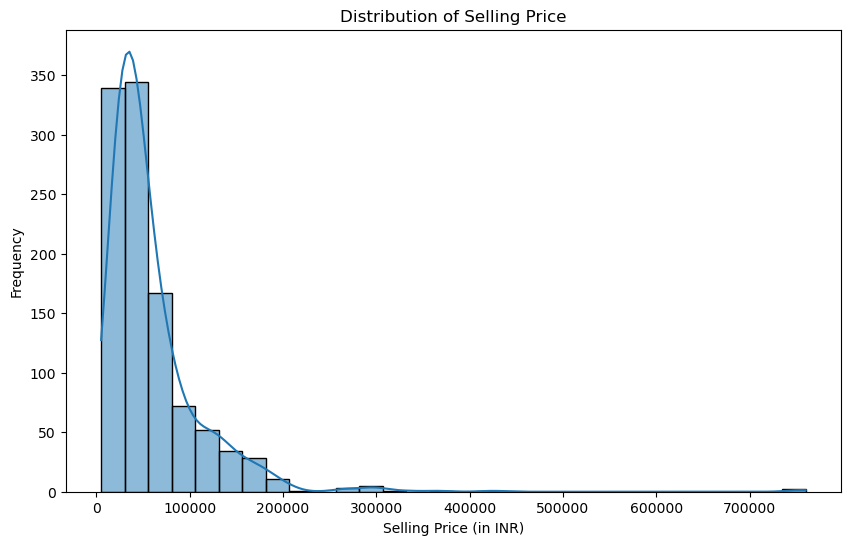

In [8]:
# Distribution of selling_price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in INR)')
plt.ylabel('Frequency')
plt.show()

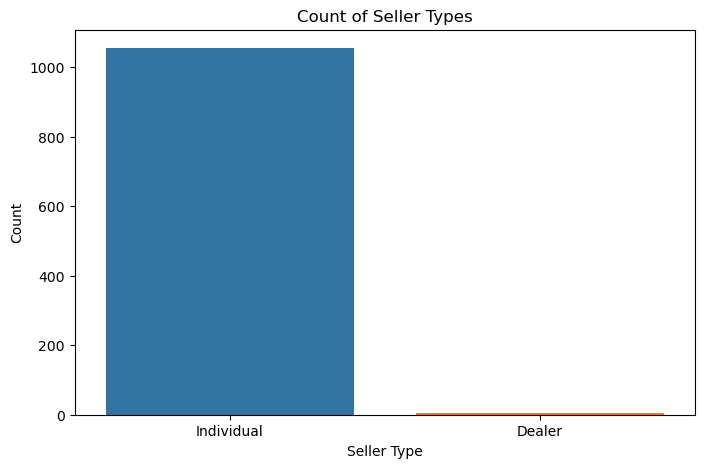

In [9]:
# Count plot for seller_type
plt.figure(figsize=(8, 5))
sns.countplot(x='seller_type', data=df)
plt.title('Count of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

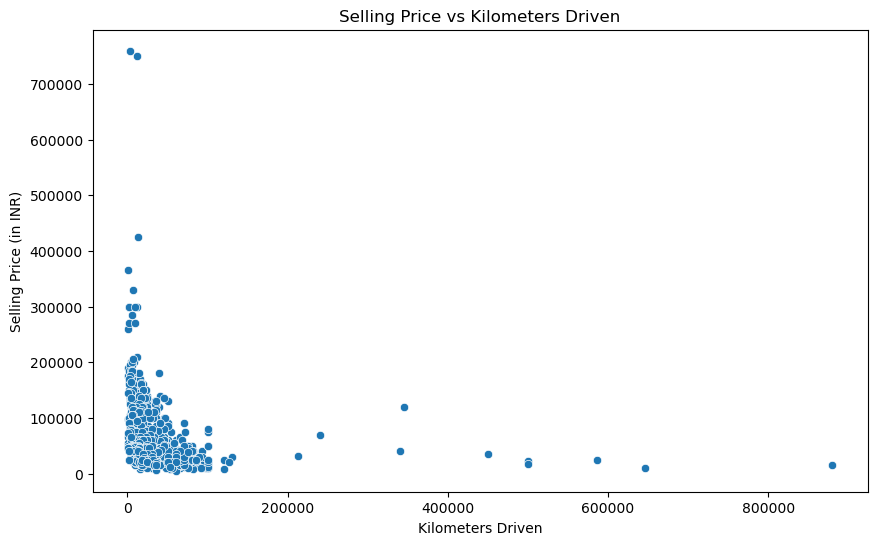

In [10]:
# Scatter plot of selling_price vs km_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (in INR)')
plt.show()

In [11]:
# Outlier Detection

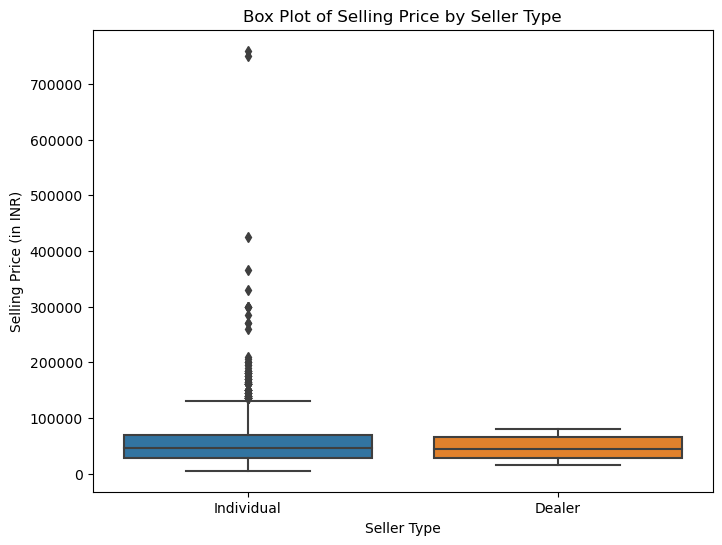

In [12]:
# Box plot for selling_price
plt.figure(figsize=(8, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Box Plot of Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (in INR)')
plt.show()

In [13]:
# Yearwise Sales

In [14]:
df['year'].unique()

array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995], dtype=int64)

In [15]:
yearwise = df.groupby('year')['selling_price'].sum().to_frame()
yearwise

,selling_price
year,
1988,20000
1991,6000
1993,130000
1995,150000
1997,35000
1998,85000
1999,15000
2000,125000
2001,80000


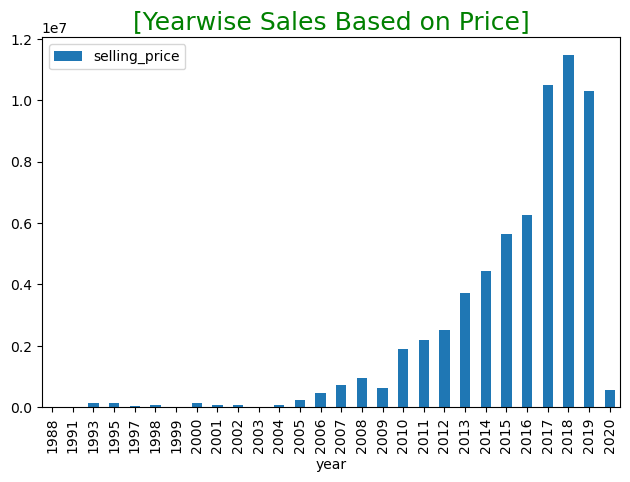

In [16]:
yearwise.plot(kind = 'bar')
plt.tight_layout()
plt.title('[Yearwise Sales Based on Price]' , size = 18 , color = 'g')
plt.show()

In [17]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

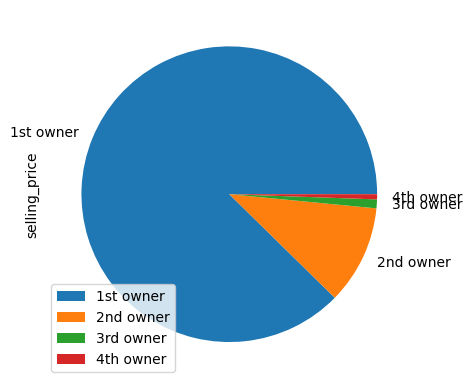

In [18]:
df.groupby('owner').aggregate({'selling_price' : 'sum'}).plot(kind = 'pie' , subplots = True)
plt.show()

In [19]:
df.groupby('owner').aggregate({'selling_price' : 'sum'})

,selling_price
owner,
1st owner,55461080
2nd owner,6846999
3rd owner,613000
4th owner,355000


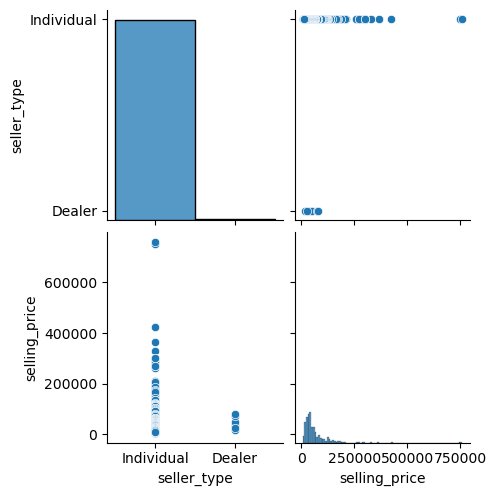

In [20]:
sns.pairplot(df , x_vars = ["seller_type" , "selling_price" ],y_vars = ["seller_type" , "selling_price"])

In [21]:
# find missing Values
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [22]:
# Fill 0 instead of null
df.fillna(0)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,0.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,0.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [23]:
# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['seller_type'] = le.fit_transform(df['seller_type'])
df['owner'] = le.fit_transform(df['owner'])

In [24]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [25]:
df.fillna(0 , inplace = True)

In [26]:
# Calculate age of the bike from 'year'
# Assuming current year
current_year = 2024  
df['bike_age'] = current_year - df['year']
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,Royal Enfield Classic 350,175000,2019,1,0,350,0.0,5
1,Honda Dio,45000,2017,1,0,5650,0.0,7
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,0,12000,148114.0,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,0,23000,89643.0,9
4,Yamaha SZ [2013-2014],20000,2011,1,1,21000,0.0,13
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1,0,500000,52000.0,14
1057,Honda CB twister,16000,2012,1,0,33000,51000.0,12
1058,Bajaj Discover 125,15000,2013,1,1,35000,57000.0,11
1059,Honda CB Shine,12000,2009,1,0,53000,58000.0,15


In [27]:
df['selling_price'].sort_values().head()

543    5000
748    6000
567    6000
77     7500
115    7500
Name: selling_price, dtype: int64

In [28]:
# Difference Between Selling_price and ex_showroom_price

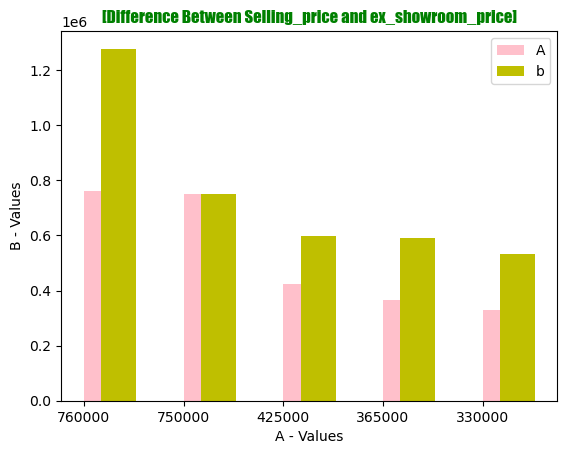

In [29]:
A = df['selling_price'].sort_values(ascending = False).head()
B = df['ex_showroom_price'].sort_values(ascending = False).head()
index = np.arange(5)

plt.bar(x = index , height = A , label = 'A', width = 0.35 , color = 'pink' , align = 'edge')
plt.bar(x = index+0.35 , height = B , label = 'b' , width = 0.35 , color = 'y')

font_1 = {'family' : 'fantasy' , 'size' : 12 , 'color' : 'g'}

plt.xlabel('A - Values')
plt.ylabel('B - Values')
plt.title('[Difference Between Selling_price and ex_showroom_price]' , font_1)

plt.legend()

plt.xticks(ticks = index  , labels = A)

plt.show()

In [30]:
# select the numeric columns
df_Numeric = df.select_dtypes(include = ['number'])
df_Numeric

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,175000,2019,1,0,350,0.0,5
1,45000,2017,1,0,5650,0.0,7
2,150000,2018,1,0,12000,148114.0,6
3,65000,2015,1,0,23000,89643.0,9
4,20000,2011,1,1,21000,0.0,13
...,...,...,...,...,...,...,...
1056,17000,2010,1,0,500000,52000.0,14
1057,16000,2012,1,0,33000,51000.0,12
1058,15000,2013,1,1,35000,57000.0,11
1059,12000,2009,1,0,53000,58000.0,15


In [31]:
# Remove outlier 
z_scores = np.abs(stats.zscore(df_Numeric, axis=0))

threshold = 3 #this is std of a data(1 std,2std,3std)

mask =(z_scores < threshold).all(axis=1)

df_removed=df_Numeric[mask]
df_removed

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,175000,2019,1,0,350,0.0,5
1,45000,2017,1,0,5650,0.0,7
2,150000,2018,1,0,12000,148114.0,6
3,65000,2015,1,0,23000,89643.0,9
4,20000,2011,1,1,21000,0.0,13
...,...,...,...,...,...,...,...
1055,18000,2017,1,0,35000,32000.0,7
1057,16000,2012,1,0,33000,51000.0,12
1058,15000,2013,1,1,35000,57000.0,11
1059,12000,2009,1,0,53000,58000.0,15


In [32]:
df1 = df_removed.copy()

In [33]:
from sklearn.preprocessing import StandardScaler

standard_scaling = StandardScaler()

Scaled_data = standard_scaling.fit_transform(df1)
Scaled_df = pd.DataFrame(Scaled_data , columns = df1.columns)

Scaled_df

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,2.983982,1.290968,0.0,-0.358858,-1.323113,-0.992957,-1.290968
1,-0.279070,0.761017,0.0,-0.358858,-1.089508,-0.992957,-0.761017
2,2.356472,1.025992,0.0,-0.358858,-0.809623,2.050154,-1.025992
3,0.222938,0.231065,0.0,-0.358858,-0.324783,0.848824,-0.231065
4,-0.906580,-0.828838,0.0,2.786614,-0.412936,-0.992957,0.828838
...,...,...,...,...,...,...,...
1003,-0.956781,0.761017,0.0,-0.358858,0.204133,-0.335493,-0.761017
1004,-1.006982,-0.563862,0.0,-0.358858,0.115980,0.054876,0.563862
1005,-1.032082,-0.298886,0.0,2.786614,0.204133,0.178150,0.298886
1006,-1.107383,-1.358789,0.0,-0.358858,0.997508,0.198696,1.358789


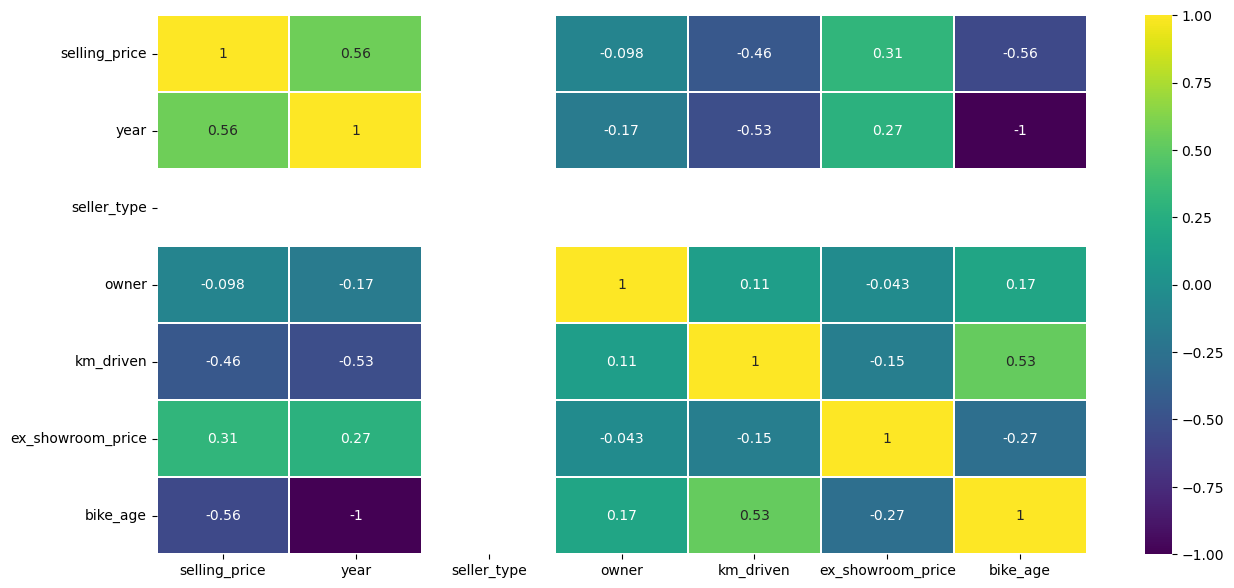

In [34]:
# correlation for preprocessing data

corr = df1.corr()

fig,ax = plt.subplots(figsize = (15,7))

sns.heatmap(corr ,annot = True , linewidths = 0.05 , vmin = -1 , 
           vmax = 1 , cmap = 'viridis')
plt.show()

In [35]:
# Importing train_test_split function for splitting data and  LinearRegression model for regression tasks
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
x = Scaled_df['year']
y = Scaled_df['selling_price']

In [37]:
# splitting the datas into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2, random_state = 42)

In [38]:
# Assuming x_train and y_train are pandas Series
# Convert Series to numpy array and reshape
x_train_np = x_train.to_numpy().reshape(-1, 1)

# Initialize and fit the model
model = LinearRegression()
model.fit(x_train_np, y_train)

# Assuming x_test is a pandas Series
x_test_np = x_test.to_numpy().reshape(-1, 1)

# Predict using x_test
y_pred = model.predict(x_test_np)

# Calculate R-squared of the regression model
r_squared = model.score(x_train_np, y_train)
print("R-squared:", r_squared)

R-squared: 0.3135159847977874


In [39]:
# OLS summary
SLR_model = sm.OLS(y_train, x_train).fit()

In [40]:
print(SLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                              367.4
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                    9.39e-68
Time:                        17:38:32   Log-Likelihood:                         -1011.8
No. Observations:                 806   AIC:                                      2026.
Df Residuals:                     805   BIC:                                      2030.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Support Vector Method

In [42]:
Scaled_df.head(5)

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,2.983982,1.290968,0.0,-0.358858,-1.323113,-0.992957,-1.290968
1,-0.279070,0.761017,0.0,-0.358858,-1.089508,-0.992957,-0.761017
2,2.356472,1.025992,0.0,-0.358858,-0.809623,2.050154,-1.025992
3,0.222938,0.231065,0.0,-0.358858,-0.324783,0.848824,-0.231065
4,-0.906580,-0.828838,0.0,2.786614,-0.412936,-0.992957,0.828838


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [44]:
feature_cols = ['year','seller_type', 'owner',
 'km_driven','ex_showroom_price','bike_age']
x=Scaled_df[feature_cols]
y=Scaled_df.selling_price

In [45]:
#splitting the dataset into Training and Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, 
test_size=0.3, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)

(705, 6)

(705,)

(303, 6)

(303,)

In [46]:
# Example conversion if y_train is continuous and you have a threshold for classification
threshold = 0.5
y_train_classes = np.where(y_train > threshold, 1, 0)
y_test_classes = np.where(y_test > threshold, 1, 0)


In [47]:
#Fitting the Model (SVM) using 'rbf' kernel
model= SVC(kernel='rbf',random_state=0)

# Fit the SVM model
model.fit(x_train, y_train_classes)
# Make predictions on test data
svc_prediction=model.predict(x_test)

# Calculate accuracy (if applicable)
accuracy = accuracy_score(y_test_classes, svc_prediction)
print('Accuracy:', accuracy)

print('svc_prediction: ', svc_prediction)


Accuracy: 0.8745874587458746
svc_prediction:  [0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0]


In [48]:
#Evaluation Metrics for 'rbf' kernel
conf_mat=metrics.confusion_matrix(y_test_classes, svc_prediction)
print('SVC [ kernerl - rbf ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test_classes, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test_classes))


SVC [ kernerl - rbf ]
Confusion Matrix : 
 [[228  10]
 [ 28  37]]
Accuracy Score :  0.8745874587458746
Accuracy in Percentage :  87 %
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       256
           1       0.57      0.79      0.66        47

    accuracy                           0.87       303
   macro avg       0.76      0.84      0.79       303
weighted avg       0.90      0.87      0.88       303



[Text(0.5, 1.0, 'SVC [linear]')]

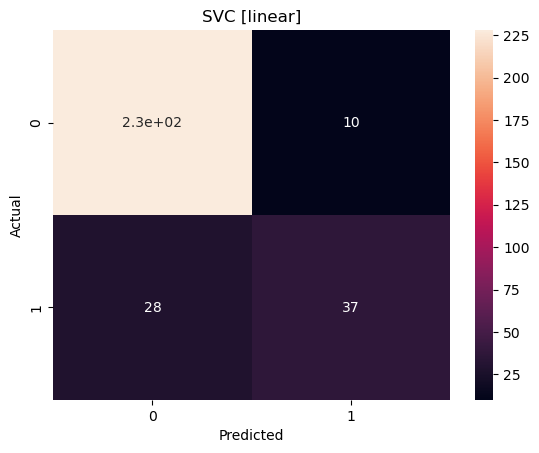

In [49]:
# Plotting the heatmap
conf_mat=pd.crosstab(y_test_classes, svc_prediction, rownames=['Actual'],
colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True).set(title='SVC [linear]')


# Hyperparametric Tuning

In [51]:
from sklearn.model_selection import GridSearchCV 

In [52]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train_classes)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.823 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [54]:
# Assuming a threshold of 0 for binary classification
y_test_binary = (y_test > 0).astype(int)

In [55]:
from sklearn.metrics import classification_report

# Convert y_test to binary labels
y_test_binary = (y_test > 0).astype(int)

# Now fit and predict using the correct label format
grid_predictions = grid.predict(x_test)

# Print the classification report
print(classification_report(y_test_binary, grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       189
           1       0.91      0.38      0.53       114

    accuracy                           0.75       303
   macro avg       0.82      0.68      0.68       303
weighted avg       0.79      0.75      0.72       303



In [56]:
Accuracy_score=metrics.accuracy_score(y_test_binary, svc_prediction)
print('Accuracy Score : ', Accuracy_score)

Accuracy Score :  0.7458745874587459


# Decision Tree

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
feature_cols = ['year','seller_type', 'owner',
 'km_driven','ex_showroom_price','bike_age']
x=Scaled_df[feature_cols]
y=Scaled_df.selling_price

In [60]:
#splitting the dataset into Training and Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, 
test_size=0.3, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)

(705, 6)

(705,)

(303, 6)

(303,)

In [61]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Instantiate Decision Tree classifier
model = DecisionTreeRegressor(random_state=42)

# Fitting the model
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
# making Prediction
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7409220742090152
R-squared: 0.0745314895758108


In [64]:
# Import the plot_tree function from sklearn.tree
from sklearn.tree import plot_tree

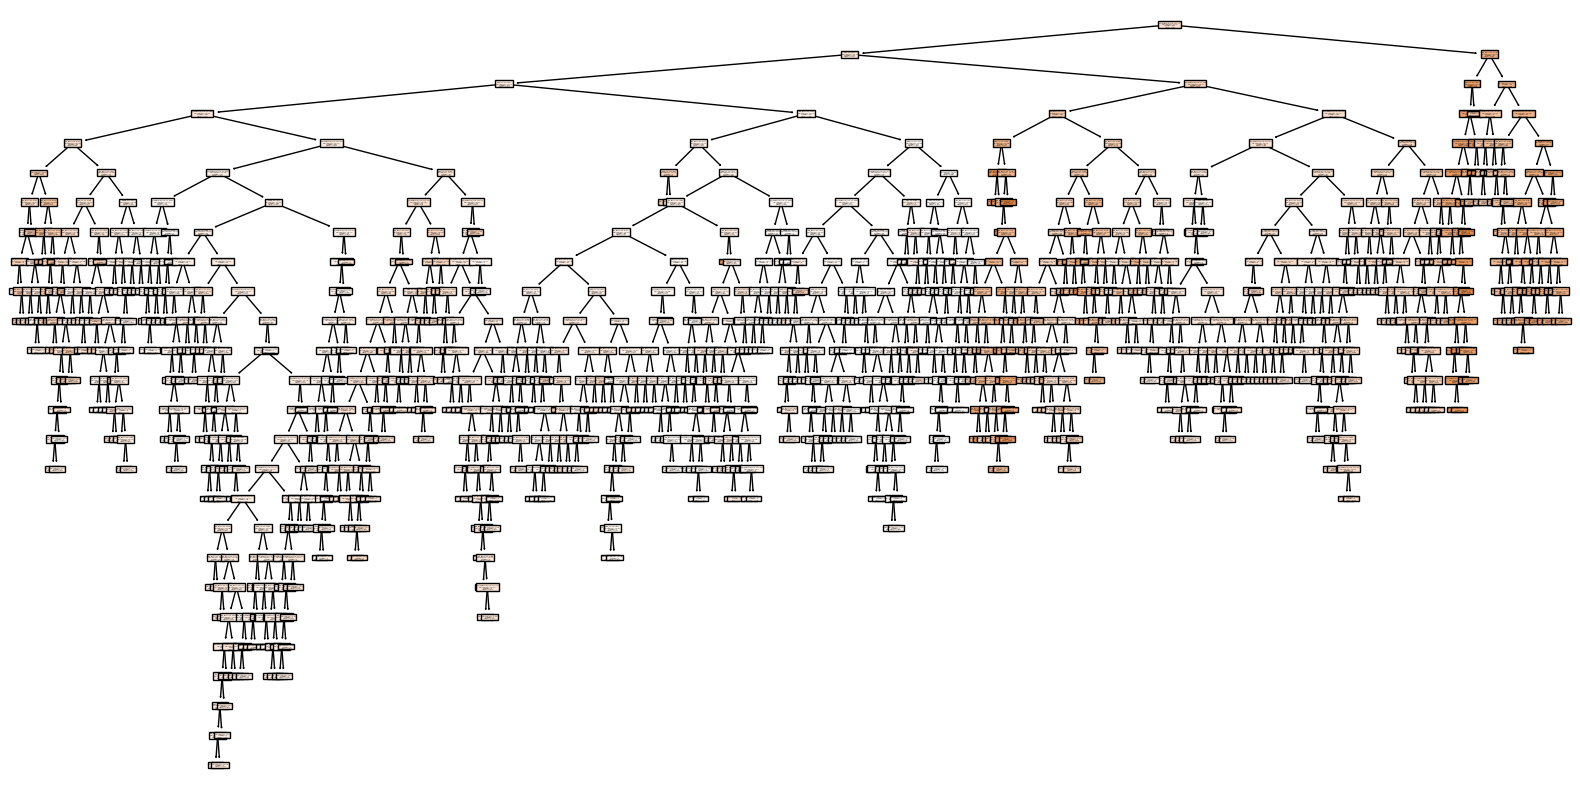

In [65]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names = x.columns.tolist())
plt.show()

# Random Forest

In [67]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Split the data into features and target variable
X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [71]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 603744059.9186587
R^2 Score: 0.7710306576520379


In [72]:
# Define a tolerance level (e.g., within 10% of the actual value)
tolerance = 0.10

# Calculate the absolute percentage error
percentage_errors = abs((y_pred - y_test) / y_test)

# Calculate the percentage of predictions within the tolerance level
within_tolerance = (percentage_errors < tolerance).mean()

print(f'Percentage of predictions within {tolerance*100}% of the actual value: {within_tolerance*100:.2f}%')

Percentage of predictions within 10.0% of the actual value: 30.05%


# K-Nearest Neighbour

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [76]:
# Predict on the test data
y_pred = knn_model.predict(X_test)

In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 802664203.0356808
R2 Score: 0.6955903885495918


In [78]:
# Additional: Calculate the percentage of predictions within a certain tolerance
tolerance = 0.10  # 10% tolerance
percentage_errors = abs((y_pred - y_test) / y_test)
within_tolerance = (percentage_errors < tolerance).mean()

print(f'Percentage of predictions within {tolerance*100}% of the actual value: {within_tolerance*100:.2f}%')

Percentage of predictions within 10.0% of the actual value: 16.90%


# Conclusion

### 1. OLS Regression Analysis:
The Ordinary Least Squares (OLS) regression model has been used to predict the selling price based on the year. Here are the key findings:

Model Summary:

### R-squared (uncentered): 0.313
This indicates that approximately 31.3% of the variability in the selling price can be explained by the year. Since it's uncentered (no constant in the model), this R-squared value is not directly comparable to a typical R-squared.
Adjusted R-squared (uncentered): 0.313
This value is similar to the R-squared, confirming the consistency of the model.
F-statistic: 367.4 (p-value: 9.39e-68)
The model is statistically significant with a very low p-value, indicating that the year is a significant predictor of selling price.
Coefficients:

year: 0.5673 (standard error: 0.030)
The positive coefficient for the year suggests that the selling price increases by approximately 0.5673 units for each additional year.
### Other Statistics:

Log-Likelihood: -1011.8
AIC: 2026
BIC: 2030
Durbin-Watson: 1.874
This indicates no significant autocorrelation in the residuals.
Omnibus, Prob(Omnibus), Jarque-Bera, Prob(Jarque-Bera), Skew, Kurtosis:
These statistics indicate that the residuals are not normally distributed, with evidence of skewness and kurtosis.
### 2. Support Vector Classification (SVC) with RBF Kernel:
The SVC model with an RBF kernel has been used for binary classification. Here are the key findings:

### Confusion Matrix:

True Negatives (TN): 228
False Positives (FP): 10
False Negatives (FN): 28
True Positives (TP): 37
Accuracy:

Accuracy Score: 0.8746 (87.46%)
The model correctly classified 87.46% of the instances.
Precision, Recall, F1-Score:

Class 0 (Majority Class):
Precision: 0.96
Recall: 0.89
F1-Score: 0.92
Class 1 (Minority Class):
Precision: 0.57
Recall: 0.79
F1-Score: 0.66
Macro Average:

Precision: 0.76
Recall: 0.84
F1-Score: 0.79
Weighted Average:

Precision: 0.90
Recall: 0.87
F1-Score: 0.88
Summary:
### Regression Model:

The year is a significant predictor of selling price, with the model explaining around 31.3% of the variance. The relationship between the year and selling price is positive.
There is some evidence of non-normality in the residuals, which could be investigated further.
Classification Model:

The SVC with RBF kernel achieved an overall accuracy of 87.46%, performing well in distinguishing between the two classes.
The model shows a high precision for the majority class (0) but lower precision for the minority class (1), indicating potential class imbalance.
The recall for the minority class is relatively high (0.79), suggesting that the model is effective in identifying instances of this class.
Overall, both models demonstrate strong performance within their respective tasks. Further analysis and potential adjustments could be made to improve the handling of residuals in the regression model and to address class imbalance in the classification model.